📌 미션에 도전하기 전에 먼저!!

이번 미션에 활용되는 데이터를 다운로드 받기 위해, 주피터 노트북에서 다음 셀을 먼저 실행해주세요.

나의 컴퓨터 환경에 데이터를 저장하지 않아도, 웹 사이트에서 바로 데이터를 받아올 수 있습니다.

원활한 피드백을 위해 미션을 제출할 때에도 아래 코드를 꼭 포함해서 제출해주세요!
[참고] 한글폰트 설정 : https://github.com/ychoi-kr/koreanize-matplotlib

In [1]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 51.8 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

<데이터 특이사항>

오늘 활용할 데이터는 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 입니다. 합계, 계 데이터는 제외하였으며 판매유형별 데이터에도 면세점 데이터는 제외하고 다운로드 받은 데이터 입니다. 해당 데이터를 통해 온라인쇼핑을 통한 해외직접판매액에 대한 분석을 진행해 주세요!
[원본데이터] 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

In [4]:
print(df.shape)
print(df["판매유형별"].value_counts())
print(df.describe(include="object"))
df.head()

(2772, 5)
면세점 이외    2772
Name: 판매유형별, dtype: int64
       국가(대륙)별        상품군별   판매유형별        시점
count     2772        2772    2772      2772
unique       9          14       1        22
top         미국  컴퓨터 및 주변기기  면세점 이외  2017.1/4
freq       308         198    2772       126


,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


📌 Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
데이터는 위에서 제공된 데이터를 사용합니다.
해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

In [5]:
# 연도 추출
df["연도"] = df["시점"].map(lambda x : int(x.split(".")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018


In [6]:
# 분기 추출
df["분기"] = df["시점"].map(lambda x : int(x.split(".")[-1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [7]:
 # 데이터 -> 백만으로 컬럼명 변경
 df.rename(columns = {'데이터' : '백만'}, inplace = True)
 df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [8]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   백만       2772 non-null   int64 
 5   연도       2772 non-null   int64 
 6   분기       2772 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 151.7+ KB


In [9]:
### 답 ####
df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


In [10]:
# 자릿수 정리
pd.set_option('display.float_format', '{:.1f}'.format)
df.describe()

,백만,연도,분기
count,2772.0,2772.0,2772.0
mean,1613.1,2019.3,2.4
std,4273.4,1.6,1.1
min,-10003.0,2017.0,1.0
25%,41.8,2018.0,1.0
50%,291.5,2019.0,2.0
75%,1181.0,2021.0,3.0
max,47689.0,2022.0,4.0


In [11]:
# 원상복귀
pd.set_option('display.float_format', None)

📌 Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.


In [12]:
# 피벗테이블
df_q2 = df.pivot_table(index="국가(대륙)별", columns="연도", values="백만", aggfunc="sum")
df_q2

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


<Axes: xlabel='연도', ylabel='국가(대륙)별'>

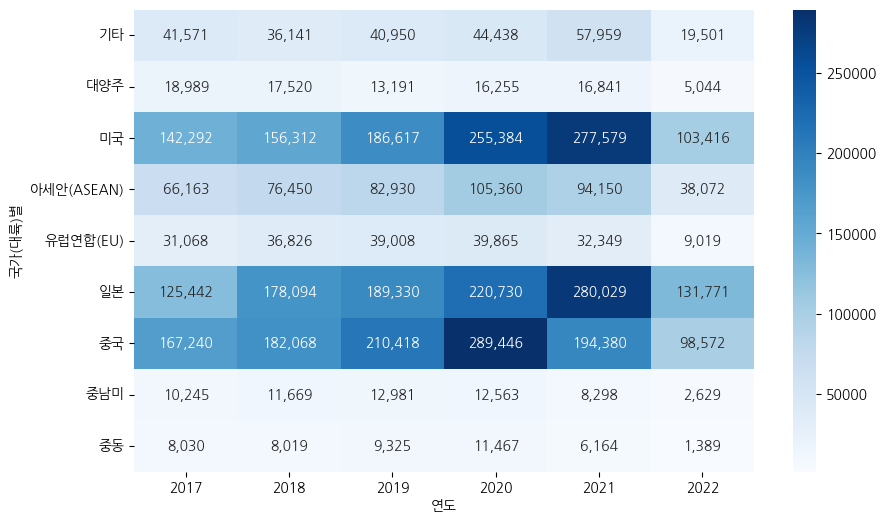

In [13]:
# 히트맵(천자리 구분 넣기)
plt.figure(figsize=(10,6))
sns.heatmap(df_q2, cmap="Blues", annot=True, fmt=",d")

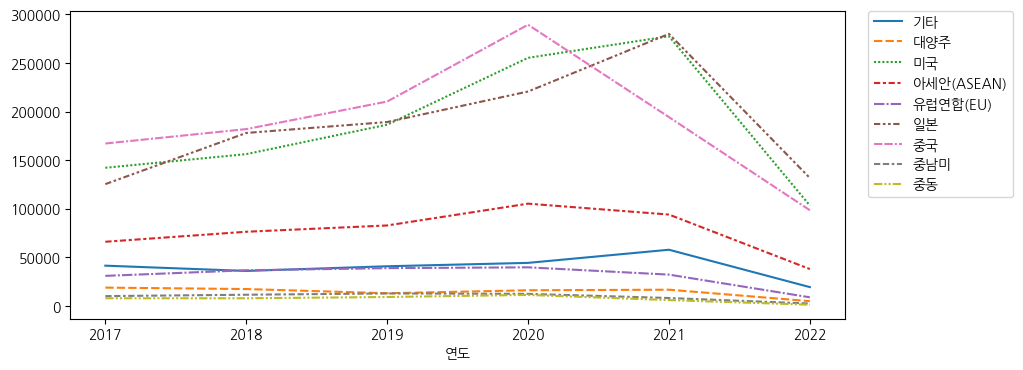

In [25]:
# 라인플랏(전체 비교)
df_q2_2 = df_q2.transpose()
plt.figure(figsize=(10,4))
sns.lineplot(data=df_q2_2)
plt.legend(bbox_to_anchor=(1.03,1.0), borderaxespad=0.)

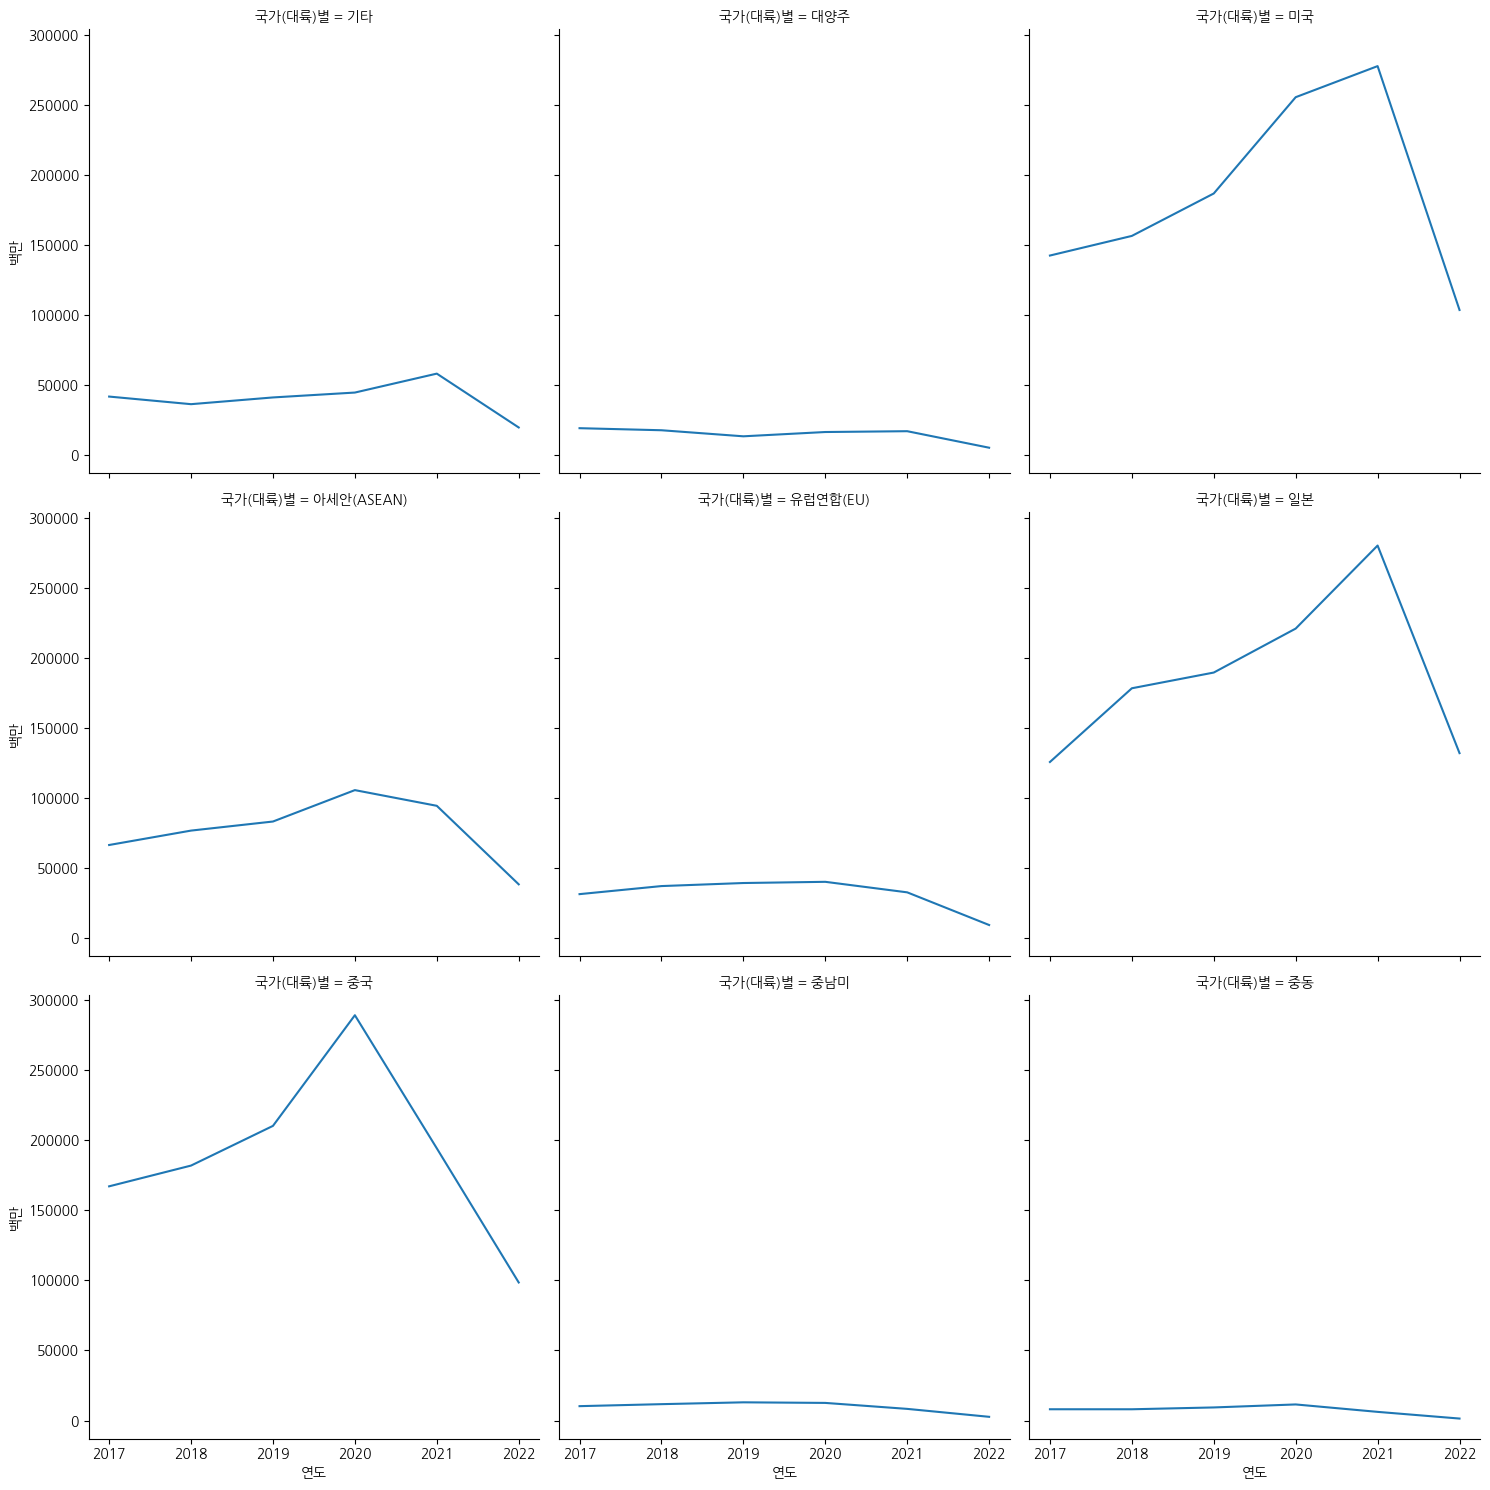

In [ ]:
# 각 국가별 플랏
df_q2_3 = df.groupby(["연도","국가(대륙)별"])["백만"].sum().reset_index()
sns.relplot(data=df_q2_3, x="연도", y="백만", kind="line", col="국가(대륙)별", col_wrap=3)

📌 Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.


In [ ]:
# 연도별로 묶음
df_year = df.groupby("연도")["백만"].sum().reset_index()
df_year

,연도,백만
0,2017,611040
1,2018,703099
2,2019,784750
3,2020,995508
4,2021,967749
5,2022,409413


<Axes: xlabel='연도', ylabel='백만'>

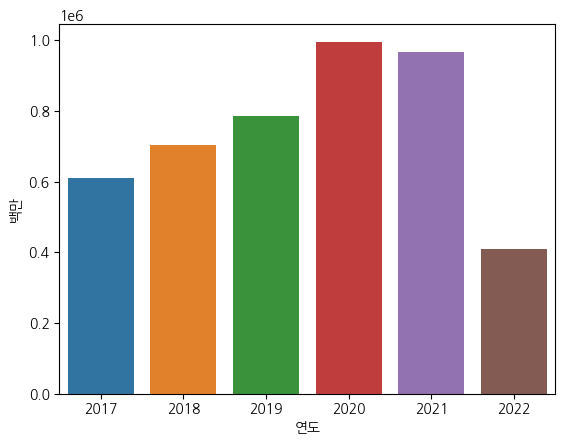

In [ ]:
sns.barplot(data=df_year, x="연도", y="백만")

✅ 2019년 대비 2020년의 온라인 쇼핑 판매액이 증가함.

✅ 코로나로 인해 증가한 것으로 사료됨.

In [ ]:
# 코로나 전(2019) vs 코로나 후(2020) 비교를 위한 데이터
df_q3_2019 = df[df["연도"] == 2019].copy()
df_q3_2020 = df[df["연도"] == 2020].copy()

In [ ]:
# 2019년 데이터
df_q3_2019 = df_q3_2019.groupby(["상품군별", "국가(대륙)별"])["백만"].sum()
df_q3_2019.unstack()

국가(대륙)별,기타,대양주,미국,아세안(ASEAN),유럽연합(EU),일본,중국,중남미,중동
상품군별,,,,,,,,,
가전·전자·통신기기,1625,2328,8297,9439,3659,2344,1558,979,834
기 타,2961,673,21343,3978,3298,22813,4904,544,446
농축수산물,2,1,13,33,0,18,59,0,0
사무·문구,95,25,454,2374,35,2694,187,0,4
생활용품 및 자동차용품,1792,1226,11704,5604,2515,4980,16809,2140,1572
서 적,4584,272,8138,4434,257,574,5073,646,294
소프트웨어,29,20,700,8,94,14,7,17,20
스포츠·레저용품,522,475,6764,6118,1424,778,2004,304,180
아동·유아용품,689,481,5598,5104,1253,578,4083,265,156


In [ ]:
# 2020년 데이터
df_q3_2020 = df_q3_2020.groupby(["상품군별", "국가(대륙)별"])["백만"].sum()
df_q3_2020.unstack()

국가(대륙)별,기타,대양주,미국,아세안(ASEAN),유럽연합(EU),일본,중국,중남미,중동
상품군별,,,,,,,,,
가전·전자·통신기기,1716,3825,10103,12405,3040,404,1353,912,839
기 타,3345,923,38731,2620,3907,30509,22736,625,533
농축수산물,9,1,33,17,0,2,88,0,0
사무·문구,187,21,398,3279,25,1526,403,3,4
생활용품 및 자동차용품,1464,1198,11467,6432,2560,3911,7142,1361,1060
서 적,4563,367,9709,4192,514,1055,6659,188,139
소프트웨어,21,20,865,3,99,27,4,15,17
스포츠·레저용품,755,690,5862,7423,1297,646,3999,183,196
아동·유아용품,1646,484,4934,2698,1354,1353,5606,151,121


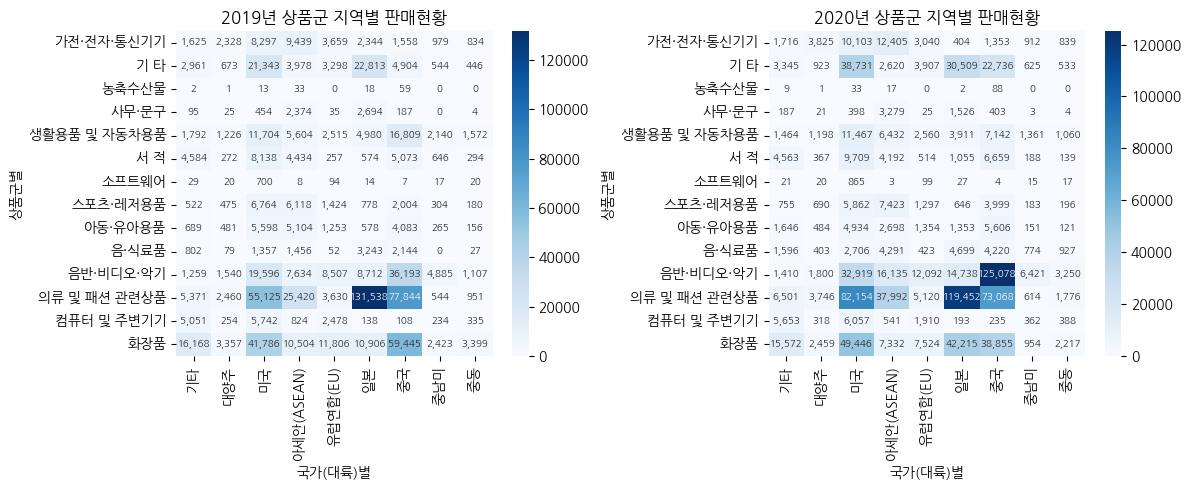

In [ ]:
plt.figure(figsize=(12, 5))  # 그림 크기 설정
plt.subplot(1, 2, 1)
sns.heatmap(df_q3_2019.unstack(), cmap="Blues", annot=True, fmt=",d", annot_kws={"size": 7})
plt.title("2019년 상품군 지역별 판매현황")

plt.subplot(1, 2, 2)
sns.heatmap(df_q3_2020.unstack(), cmap="Blues", annot=True, fmt=",d", annot_kws={"size": 7})
plt.title("2020년 상품군 지역별 판매현황")

plt.tight_layout()
plt.show()

✅ 2개년도 상품군-지역 히트맵을 시각적으로 봤을 때
 1. 큰 차이 보이는 상품군은 "음반/비디오/악기", "의류 및 패션 관련상품", "화장품"
 2. 음반/비디오/악기는 "중국"의 성장세 두드러짐
 3. 의류 및 패션 관련 상품은 "미국"의 성장세 두드러짐
 4. 화장품은 "일본"의 성장세 두드러짐

In [ ]:
df_q3_differ = df_q3_2020.unstack()-df_q3_2019.unstack()

Text(0.5, 1.0, '2019대비 2020 상품군 지역별 판매현황 변화량')

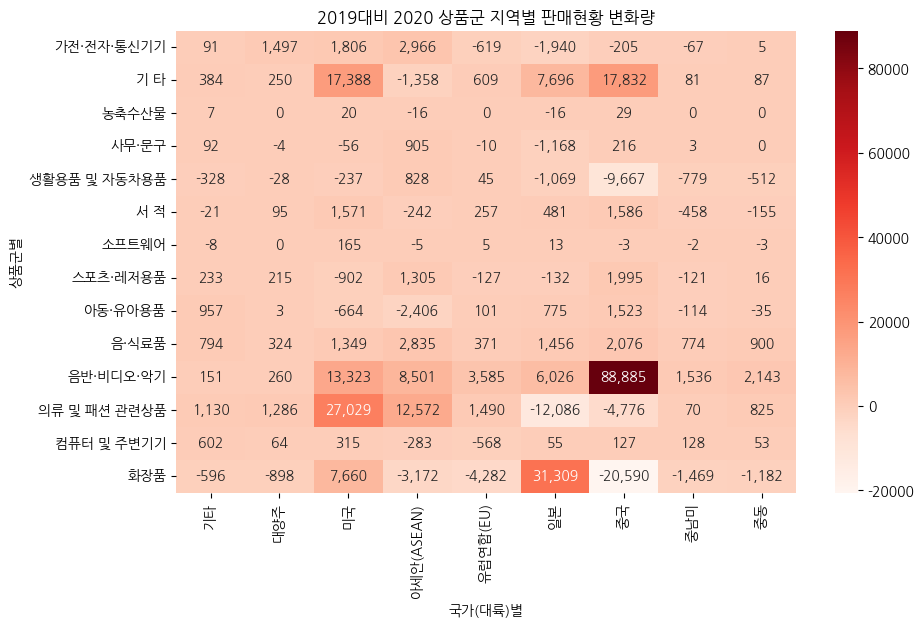

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_q3_differ, cmap="Reds", annot=True, fmt=",d")
plt.title("2019대비 2020 상품군 지역별 판매현황 변화량")

✅ 직접 감하여 보니, 두드러지던 국가별 양상이 크게 다르게 나타남.

⚓ 중국은 음반/비디오/악기는 증가한 반면, 의류 및 패션 관련상품, 화장품, 생활용품 및 자동차용품의 감소함

이는 강력한 봉쇄정책으로 인한 것으로 보임, 근거로 한류 관련 미디어의 소비가 크게 성장한 데 비해, 외출 시 필요한 화장품/의류/자동차 관련 소비가 감소함.

✔음반류 수출증가 관련 기사 : https://news.kbs.co.kr/news/pc/view/view.do?ncd=5076014&ref=A

**본 데이터는 온라인 쇼핑만을 집계하기에 실제 총 판매와는 차이가 있음, 오프라인 매장 활성화와 관련이 있을 것으로 보임.


⚓ 일본은 화장품, 음반/비디오/악기는 증가한 반면, 의류 및 패션 관련상품 등은 감소함.

마스크 강제 정책으로 피부 트러블 관련한 화장품 소비가 증가한 것으로 보임, 반면 절대적인 외출 횟수 빈도는 줄었기에 패션 관련 소비는 줄고 한류 미디어의 소비가 늘어난 것으로 보임.

✔기초 화장품 수요 증가 관련 기사 : https://www.chosun.com/economy/economy_general/2021/04/26/2F6FUFUJSNE57DR5V4HV3J2KNI/?utm_source=naver&utm_medium=referral&utm_campaign=naver-news


⚓ 미국은 전반적으로 증가 추세, Netflix의 한국드라마, BTS, 기생충 등 2020년의 한류열풍에 기인한 것으로 보임.

📌 Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.

In [ ]:
df["상품군별"].unique()

array(['컴퓨터 및 주변기기', '가전·전자·통신기기', '소프트웨어', '서 적', '사무·문구', '음반·비디오·악기',
       '의류 및 패션 관련상품', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품 및 자동차용품', '기 타'], dtype=object)

In [ ]:
df_q4 = df[(df["상품군별"].isin(["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"])) & (df["국가(대륙)별"].isin(["미국", "중국", "일본"]))]
df_q4.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1


In [ ]:
df_q4["상품군별"].unique()

array(['음반·비디오·악기', '의류 및 패션 관련상품', '화장품'], dtype=object)

In [ ]:
df_q4["국가(대륙)별"].unique()

array(['미국', '중국', '일본'], dtype=object)

In [ ]:
df_q4

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1
...,...,...,...,...,...,...,...
809,일본,화장품,면세점 이외,2021.2/4,18768,2021,2
810,일본,화장품,면세점 이외,2021.3/4,23380,2021,3
811,일본,화장품,면세점 이외,2021.4/4,22555,2021,4
812,일본,화장품,면세점 이외,2022.1/4,26664,2022,1


In [ ]:
# 합계를 표시하기 위해 그룹별로 묶음
df_q4 = df_q4.groupby(["연도","상품군별","국가(대륙)별"]).agg({"백만":"sum"})

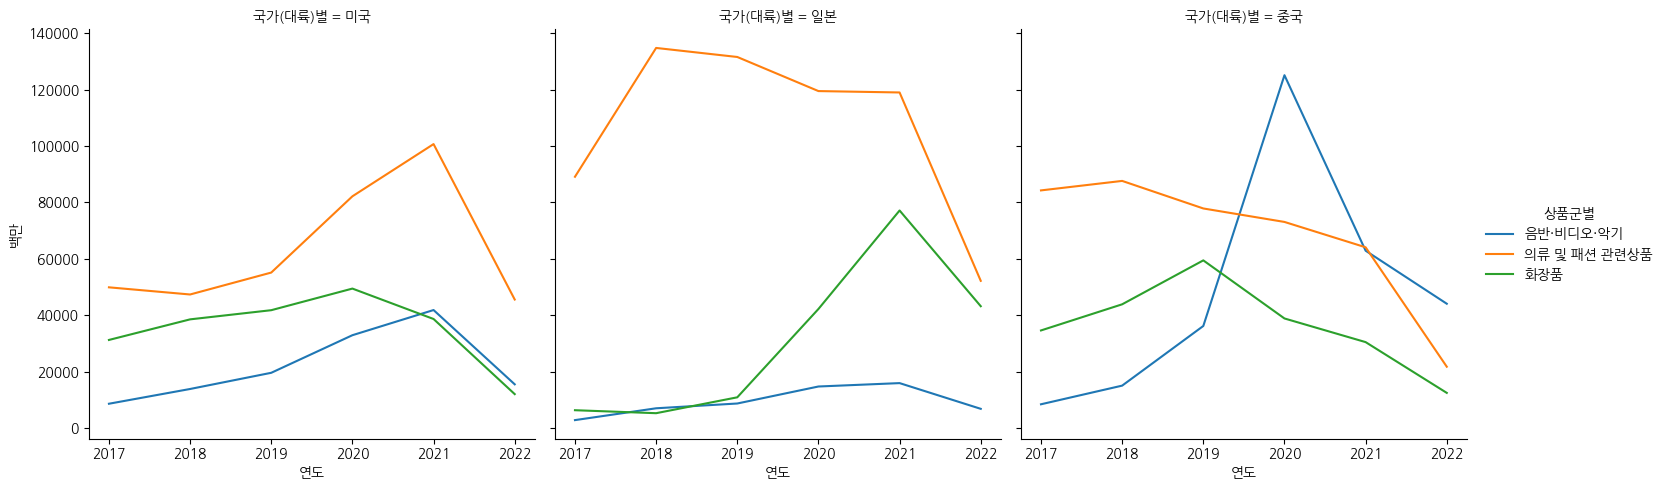

In [ ]:
sns.relplot(data=df_q4, x="연도", y="백만", hue="상품군별", col="국가(대륙)별", kind="line", errorbar=None)